In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("dataWithSomeReformatting.xlsx")

In [2]:
nations = list(set(data["Loc_experiment"]))
remove_pairs = ["BELGIUM & GERMANY", "ITALY & NETHERLANDS", "CANADA & USA", "UK & USA"]
for pair in remove_pairs:
    nations.remove(pair)
for nation in nations:
    data[nation] = 0
    data[nation][data["Loc_experiment"].str.contains(nation)]=1

<ipython-input-2-9a8cbb12a356>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nation][data["Loc_experiment"].str.contains(nation)]=1


In [3]:
countries = sorted(nations)
years = sorted(list(set(data["Year"])))

In [4]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["General_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()

# sort by number of observations
outcomes_by_country.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
BRAZIL,0.803922,102
ARGENTINA,0.886076,79
USA,0.555556,63
CANADA,0.433333,30
FRANCE,0.875000,24
CHINA,0.863636,22
POLAND,0.705882,17
ITALY,0.750000,16
GERMANY,0.600000,15


In [12]:
outcomes_by_country_df = pd.DataFrame(outcomes_by_country.sort_values("num_obs", ascending = False))
outcome_by_country_df_analysis = outcomes_by_country_df[:10]

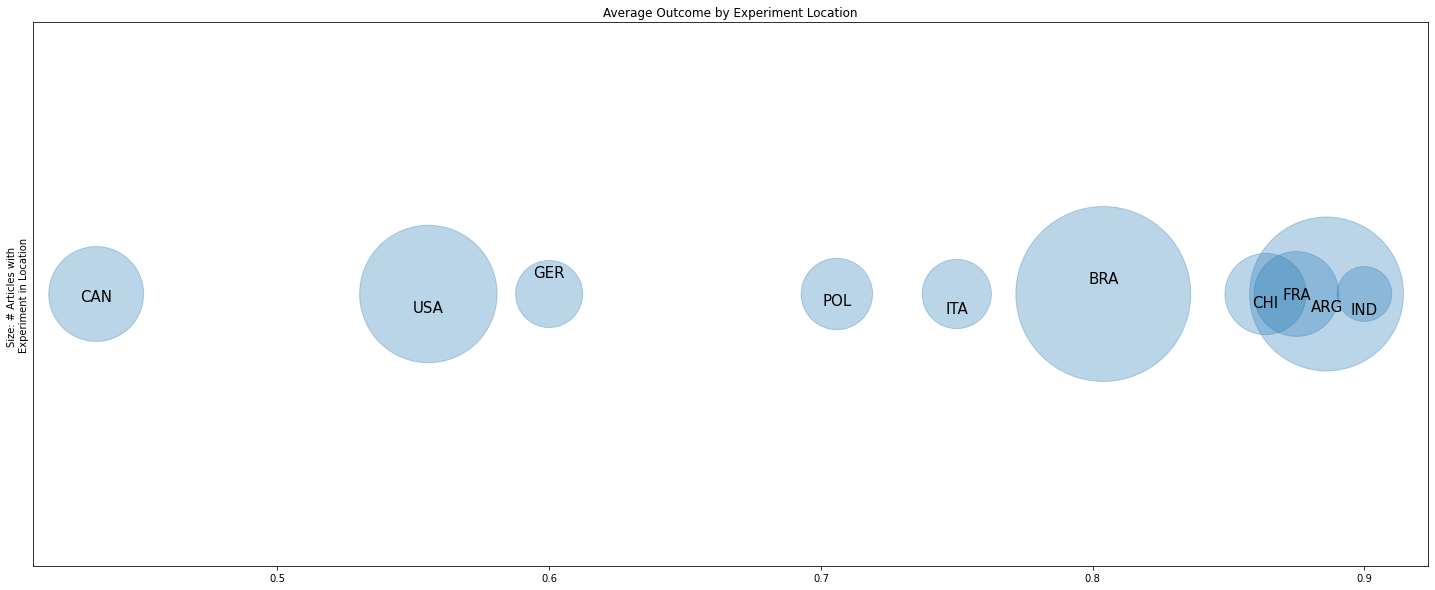

In [13]:
import random
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Experiment Location")
ax.set_ylabel('Size: # Articles with \nExperiment in Location')
ax.set_yticks([])
plt.scatter(x = outcome_by_country_df_analysis["General_outcome"], y = [0] * len(outcome_by_country_df_analysis.index), 
            s = outcome_by_country_df_analysis["num_obs"]*300, alpha = .3)

index= list(outcome_by_country_df_analysis.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax.text(outcome_by_country_df_analysis["General_outcome"].loc[ix],-.004 + random.random()* 0.008,ix[:3], 
            ha="center", fontsize = 15)

In [14]:
outcomes_by_Institution = data.groupby("Institution").mean()[["General_outcome"]]
outcomes_by_Institution["num_obs"] = data["Institution"].value_counts()

outcomes_by_Institution.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Institution,,
University,0.781333,375
Public & University,0.679245,53
Public,0.595745,47
Private & University,0.307692,13
Private,0.333333,12
International Org,0.000000,1
Public,1.000000,1
University & International Org,1.000000,1


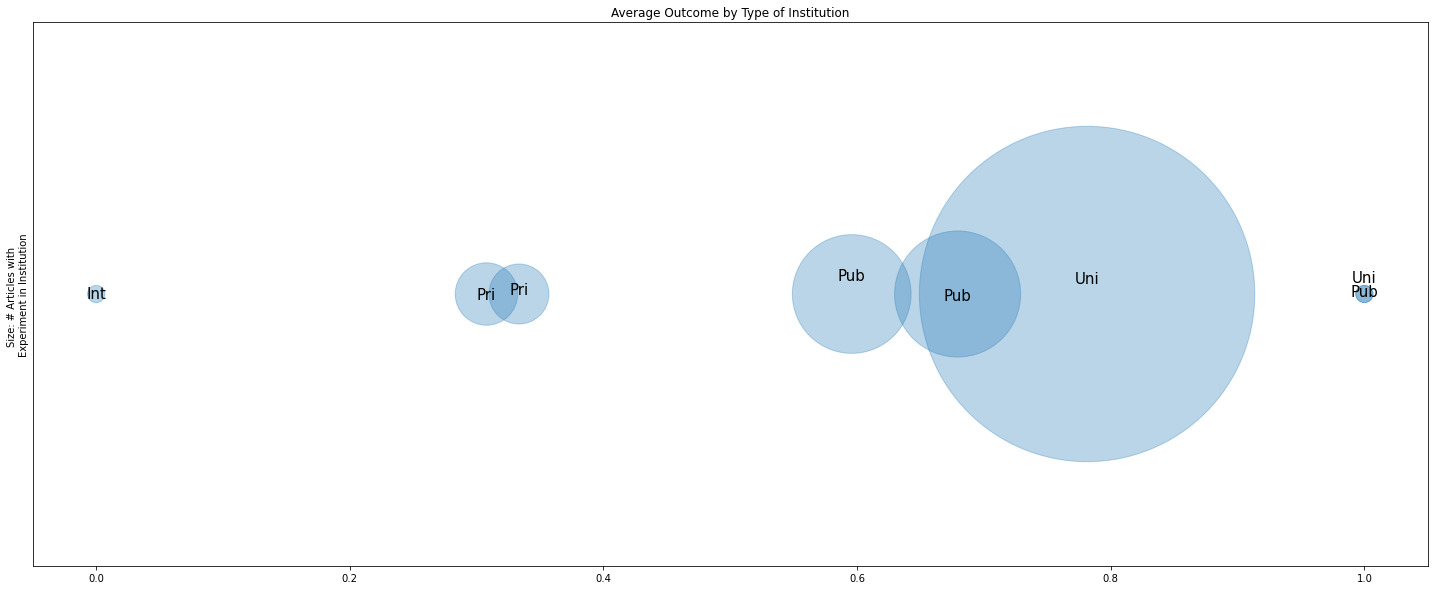

In [16]:
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Type of Institution")
ax.set_ylabel('Size: # Articles with \nExperiment in Institution')
ax.set_yticks([])
plt.scatter(x = outcomes_by_Institution["General_outcome"], y = [0] * len(outcomes_by_Institution.index), 
            s = outcomes_by_Institution["num_obs"]*300, alpha = .3)

index= list(outcomes_by_Institution.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax.text(outcomes_by_Institution["General_outcome"].loc[ix],-.004 + random.random()* 0.008,ix[:3], ha="center", fontsize = 15)

In [17]:
project_types = ('Public',
                 'Private',
                 'University',
                 'International',
                 'Research')
for key in project_types:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())

Public 306 0.7745098039215687
Private 51 0.6078431372549019
University 114 0.7982456140350878
International 12 0.5833333333333334
Research 3 0.6666666666666666
